Tải thư viện Girth

In [1]:
!pip install girth --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 933.4 kB/s eta 0:00:00


Import thư viện cần thiết

In [2]:
import numpy as np

from girth.synthetic import create_synthetic_irt_dichotomous
from girth import twopl_mml, onepl_mml, rasch_mml, tag_missing_data

import matplotlib.pyplot as plt
import seaborn as sns

import random


Ví dụ sử dụng mô hình Rasch

In [4]:
difficulty = np.linspace(-2.5, 2.5, 10)
discrimination = 1
theta = np.random.randn(11)

# Xây dựng ma trận trả lời cho 11 nguời chơi và 10 câu hỏi
syn_data = create_synthetic_irt_dichotomous(difficulty, discrimination, theta)

estimates = rasch_mml(syn_data)

difficulty_estimates = estimates['Difficulty']
difficulty_estimates

array([-2.6799931 , -1.78526175, -0.67511405, -1.17640857, -1.17640857,
       -1.78526175,  0.22051166,  0.67507883,  1.78520936,  2.67990306])

In [5]:
def icc_1pl(theta, b):
    return 1 / (1 + np.exp(-(theta - b)))

def inf_1pl(p_theta):
    return p_theta * (1 - p_theta)

Vẽ đồ thị đặc tính câu hỏi và đường thông tin câu hỏi

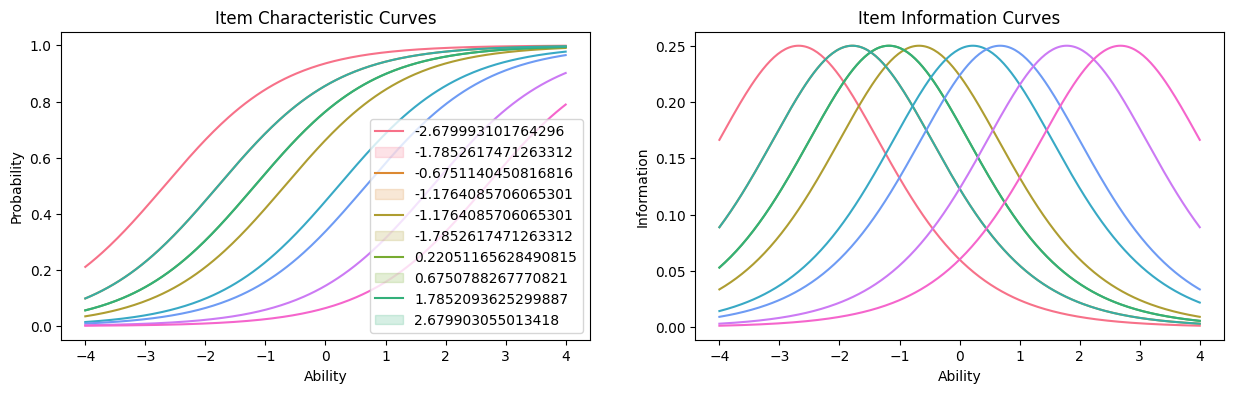

In [6]:
plt.rcParams["figure.figsize"] = (15,4)
sns.set_palette("husl", 10)
f, (ax1, ax2) = plt.subplots(1, 2)

theta = np.linspace(-4, 4, 256, endpoint=True)
for b in difficulty_estimates:
    p_theta = icc_1pl(theta, b)
    sns.lineplot(x=theta, y=p_theta, ax=ax1)
    sns.lineplot(x=theta, y=inf_1pl(p_theta), ax=ax2)

ax1.set_title('Item Characteristic Curves')
ax1.set_xlabel('Ability')
ax1.set_ylabel('Probability')

ax2.set_title('Item Information Curves')
ax2.set_xlabel('Ability')
ax2.set_ylabel('Information')

ax1.legend(difficulty_estimates)

plt.show()
